# Problemset 2
## Kris Nichols

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import statsmodels.api as sm
%matplotlib notebook

### Question 1: Part A

In [135]:
# Load Data
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')

# Setting vector of ages for X-axis
age_vec = np.arange(18, 96)

# Setting vector of income groups for y-axis
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

# Loading values into matrix
income_matrix, age_matrix = np.meshgrid(prcntl_mdpts, age_vec)

<IPython.core.display.Javascript object>


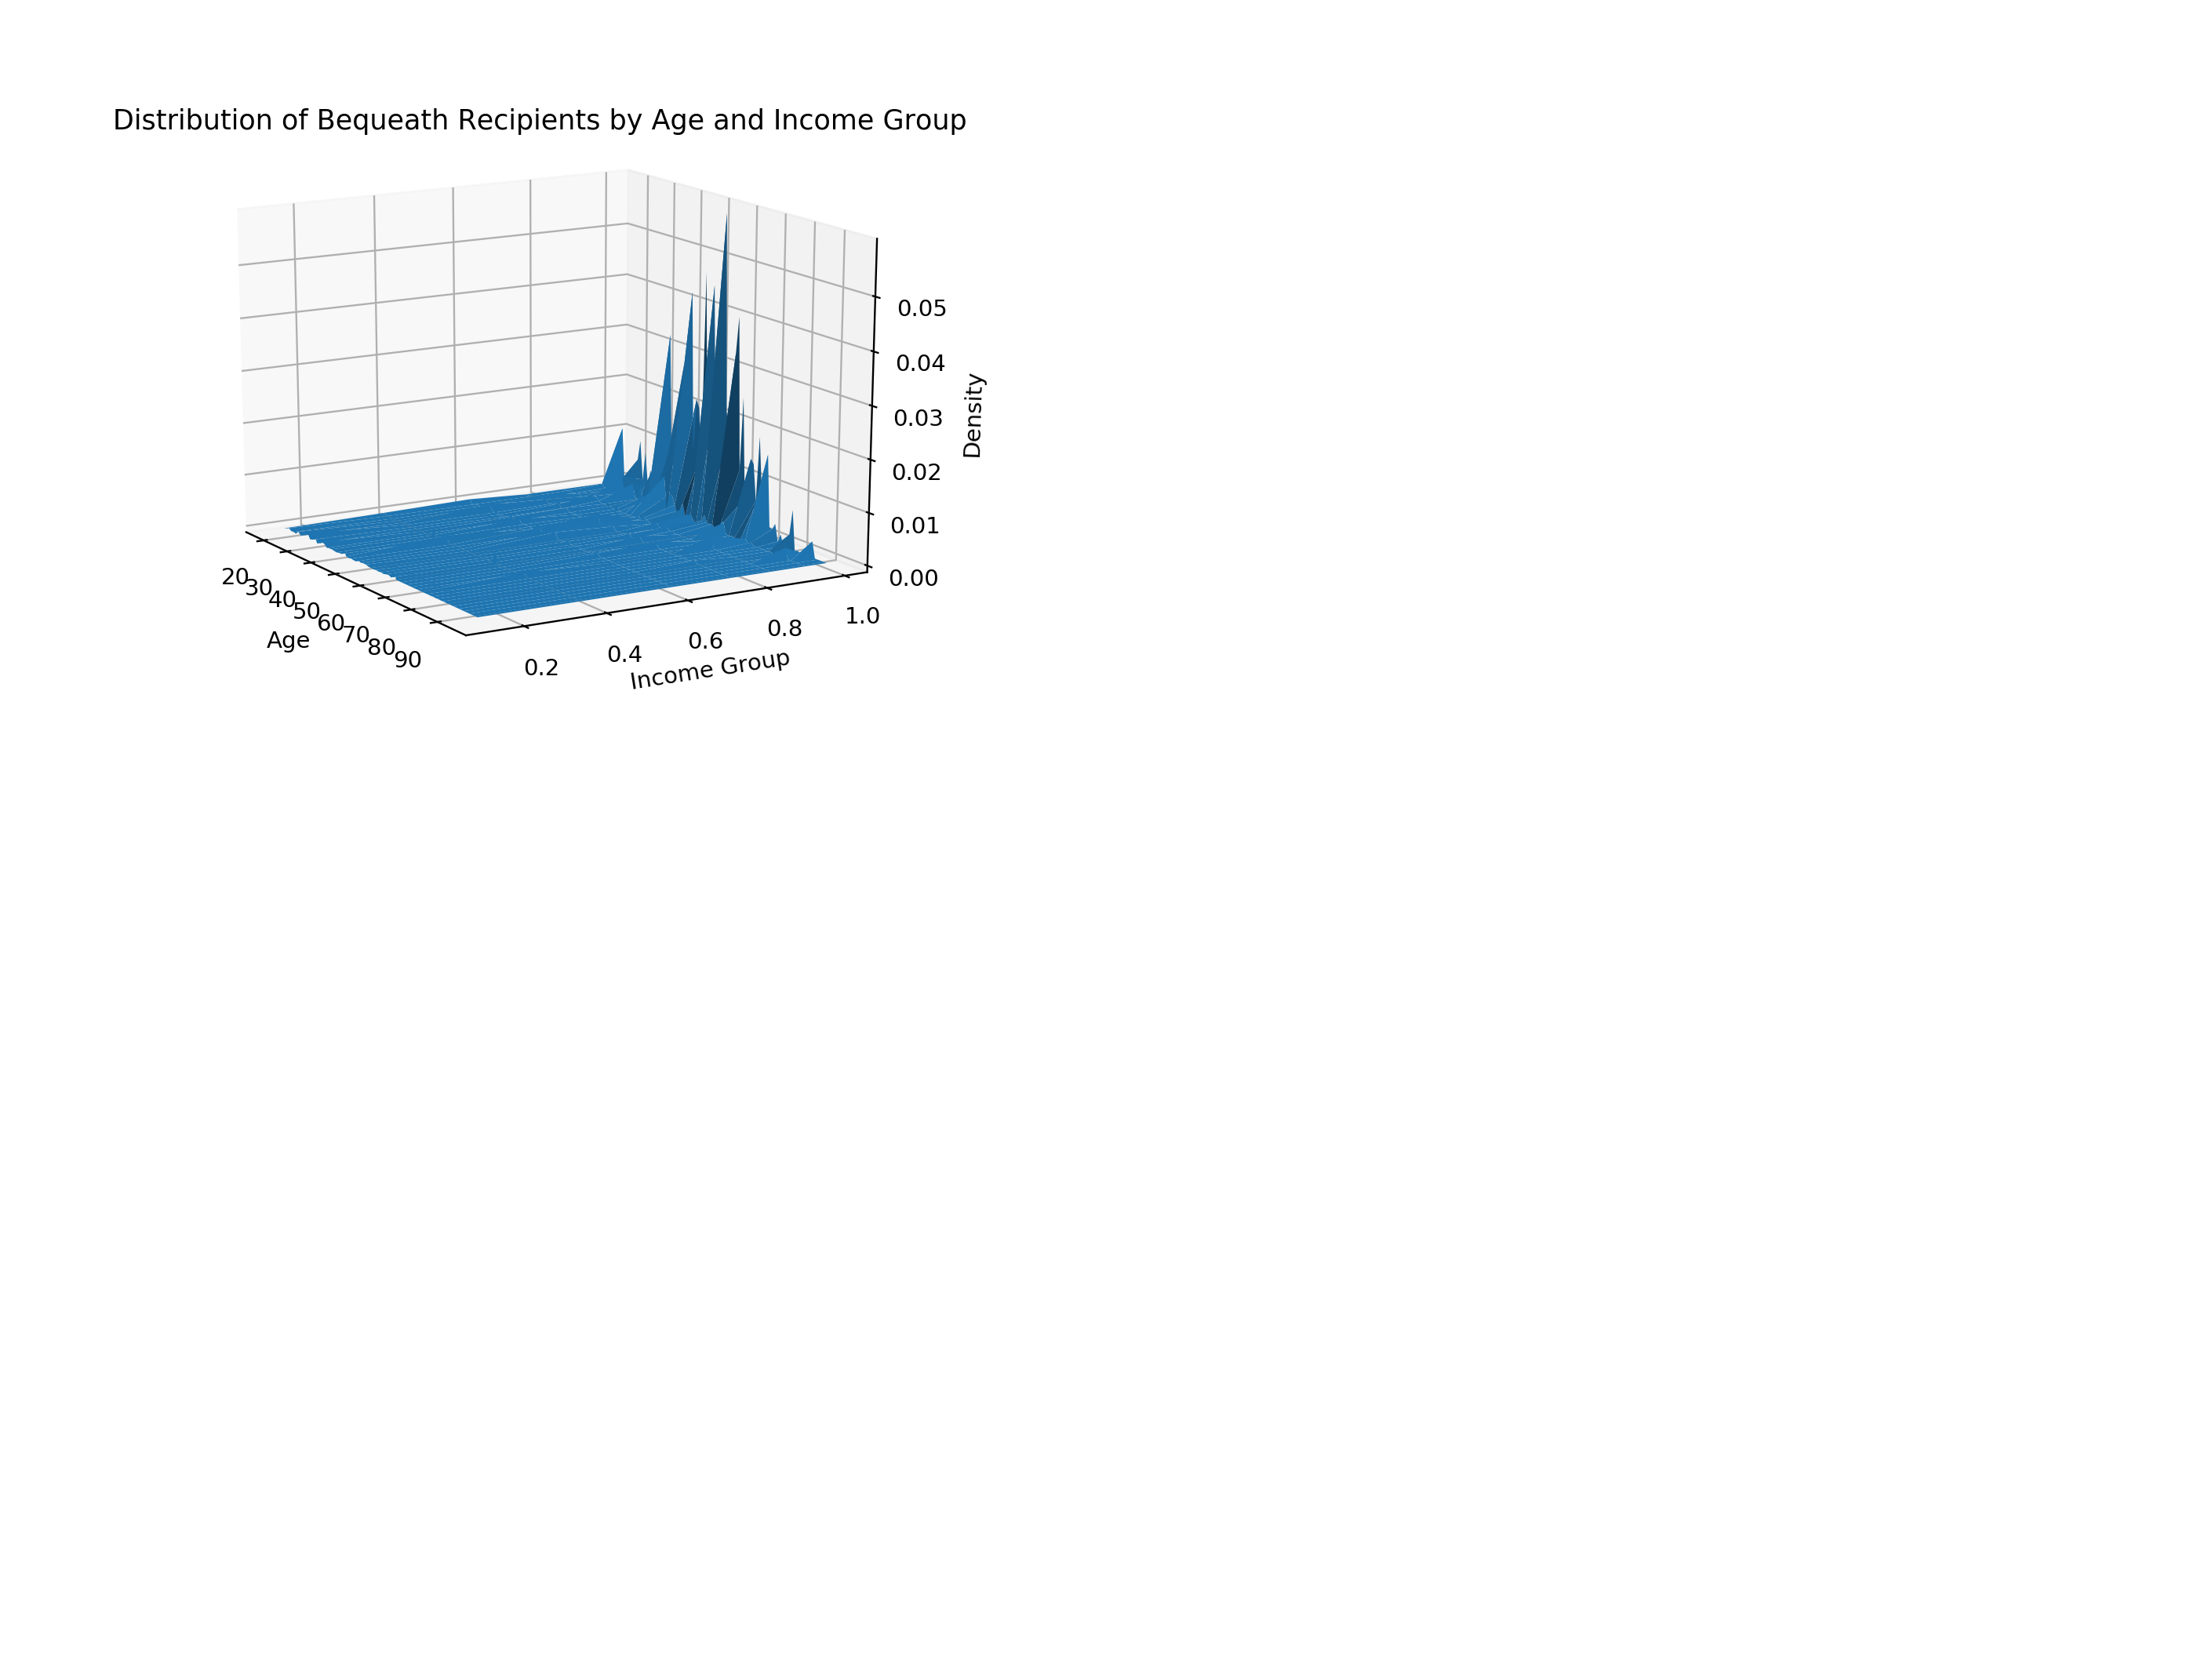

Text(0.5,0,'Age')

In [136]:
# Graph
fig = plt.figure()
ax = fig.gca(projection='3d')
# Load in matrices
ax.plot_surface(age_matrix, income_matrix, bq_data)

# Titles
ax.set_title('Distribution of Bequeath Recipients by Age and Income Group')
ax.set_ylabel('Income Group')
ax.set_zlabel('Density')
ax.set_xlabel('Age')

### Question 1: Part B 

In [137]:
# Find bandwith
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(bq_data)))
grid.fit(bq_data)

GridSearchCV(cv=sklearn.cross_validation.LeaveOneOut(n=78),
       error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.10476, ...,   9.54548,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [138]:
grid.best_params_

print("The best bandwidth is:", grid.best_params_)

The best bandwidth is: {'bandwidth': 0.10000000000000001}


In [139]:
# Best bandwith
bandwidth=0.1
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
# Matrix for income
prop_mat_inc = np.sum(bq_data, axis=0)
# Matrix for Age
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

In [140]:
# Create distribution of ability type values
for abil, num_j in zip(lambdas_mdpts, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
# Create a distribution of age values
for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

<IPython.core.display.Javascript object>


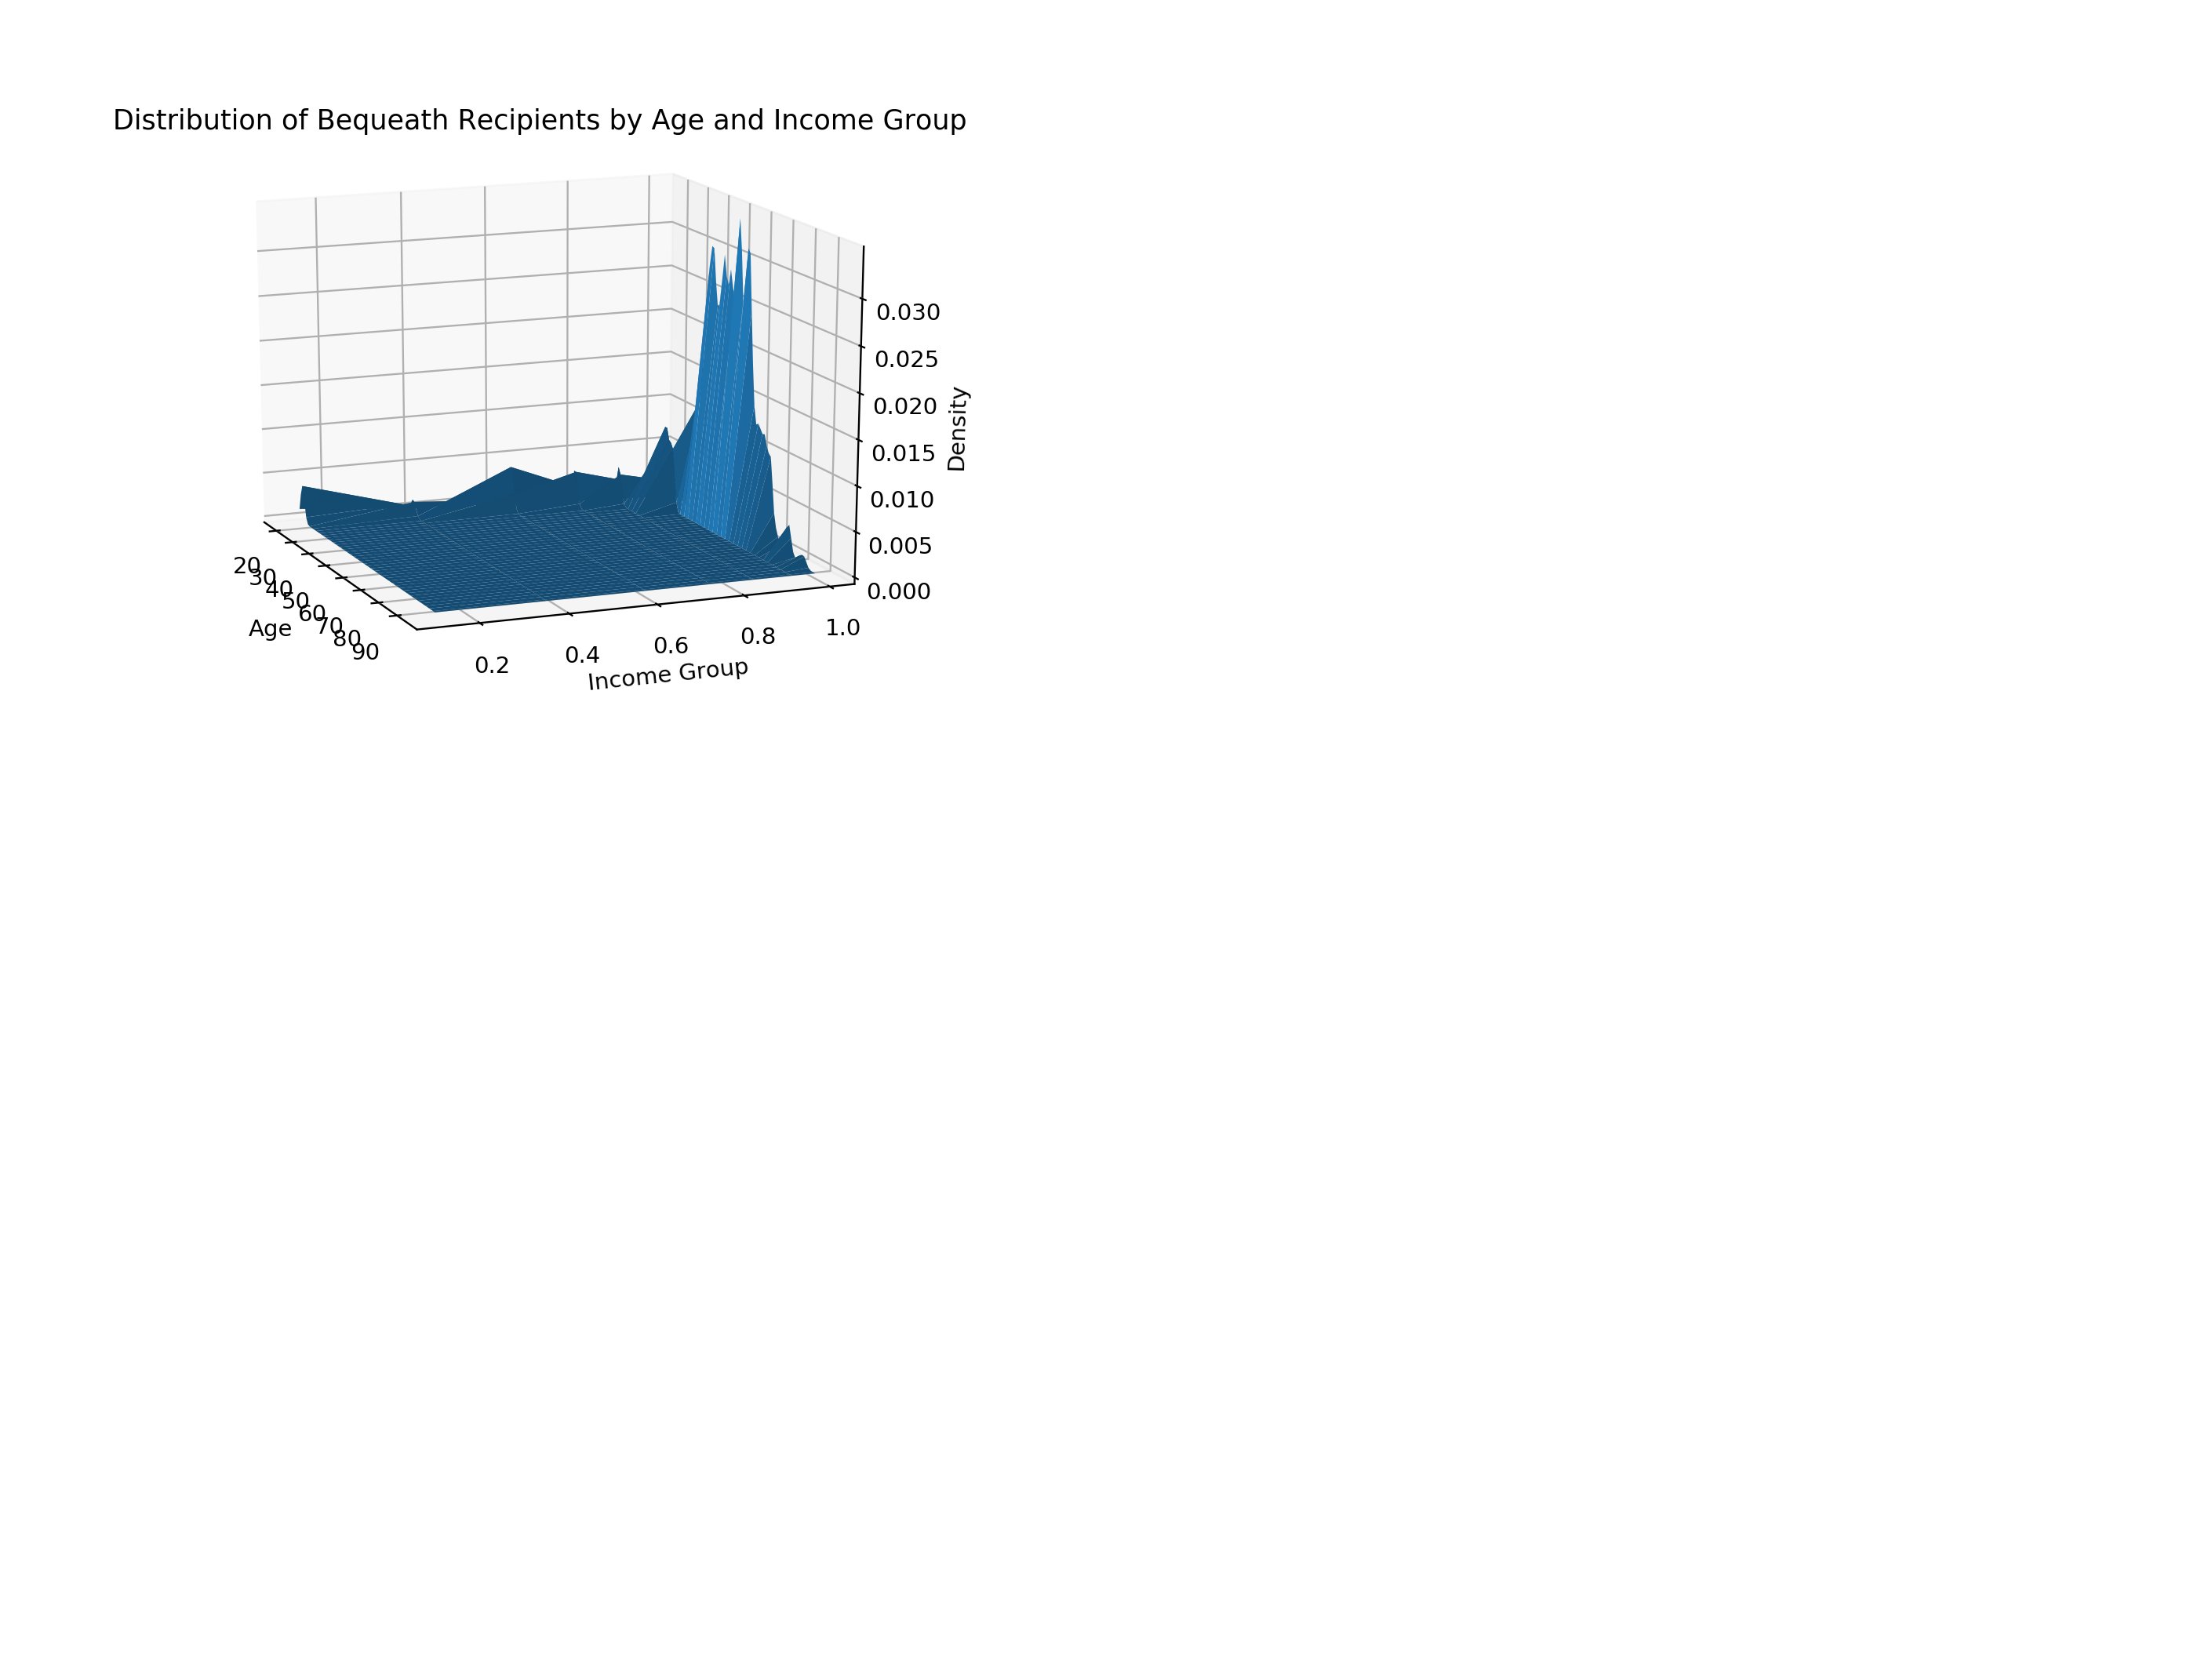

In [141]:
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)
ages_mat, abils_mat=np.meshgrid(age_vec,lambdas_mdpts)

# Graph
coords = np.vstack([item.ravel() for item in [ages_mat, abils_mat]])
BQkde = density(coords).reshape(ages_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Density')
ax.set_title('Distribution of Bequeath Recipients by Age and Income Group')
ax.plot_surface(ages_mat,abils_mat , BQkde_scaled)

In [142]:
print("The esitmated density for bequath recipients who are age 61 in the 6th income category is:", BQkde_scaled[5,44])

The esitmated density for bequath recipients who are age 61 in the 6th income category is: 1.1100676397e-06


### Question 2: Part A)

In [143]:
# Load Data
biden = pd.read_csv('biden.csv', usecols=['biden', 'age', 'educ'])
biden.dropna(inplace=True)

In [144]:
biden['age_educ'] = biden['age'] * biden['educ'] # Define interaction
biden['age_educ'] = biden['age'] * biden['educ'] 
biden['constant'] = 1

X = biden[['educ', 'age_educ','constant','age']] # Define X
Y = biden['biden'] # Define Y

In [145]:
model = sm.OLS(Y, X).fit() # Specify OLS model
model.summary() # Model Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        02:06:01   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ           1.7123      0.709      2.414      0.016       0.321       3.103
age_educ      -0.0477      0.013     -3.728      0.000      -0.073      -0.023
constant      37.5491      9.491      3.956      0.000      18.935      56.163
age            0.6674      0.169      3.950      0.000       0.336       0.999
==============================================================================
Omnibus:                       64.792   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.979
Skew:                          -0.480   Prob(JB):                     3.86e-16
Kurtosis:                       3.105   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The marginal effect of age is modeled as $\beta_1+\beta_3 X_2$. 
By observing the regression table we can see that the estimated effect of this model is $0.67-0.048education$.
All the coefficients from this model are significant at the .01 level implicating that the marginal effect of age decreases as individual's education level decreases.

<IPython.core.display.Javascript object>


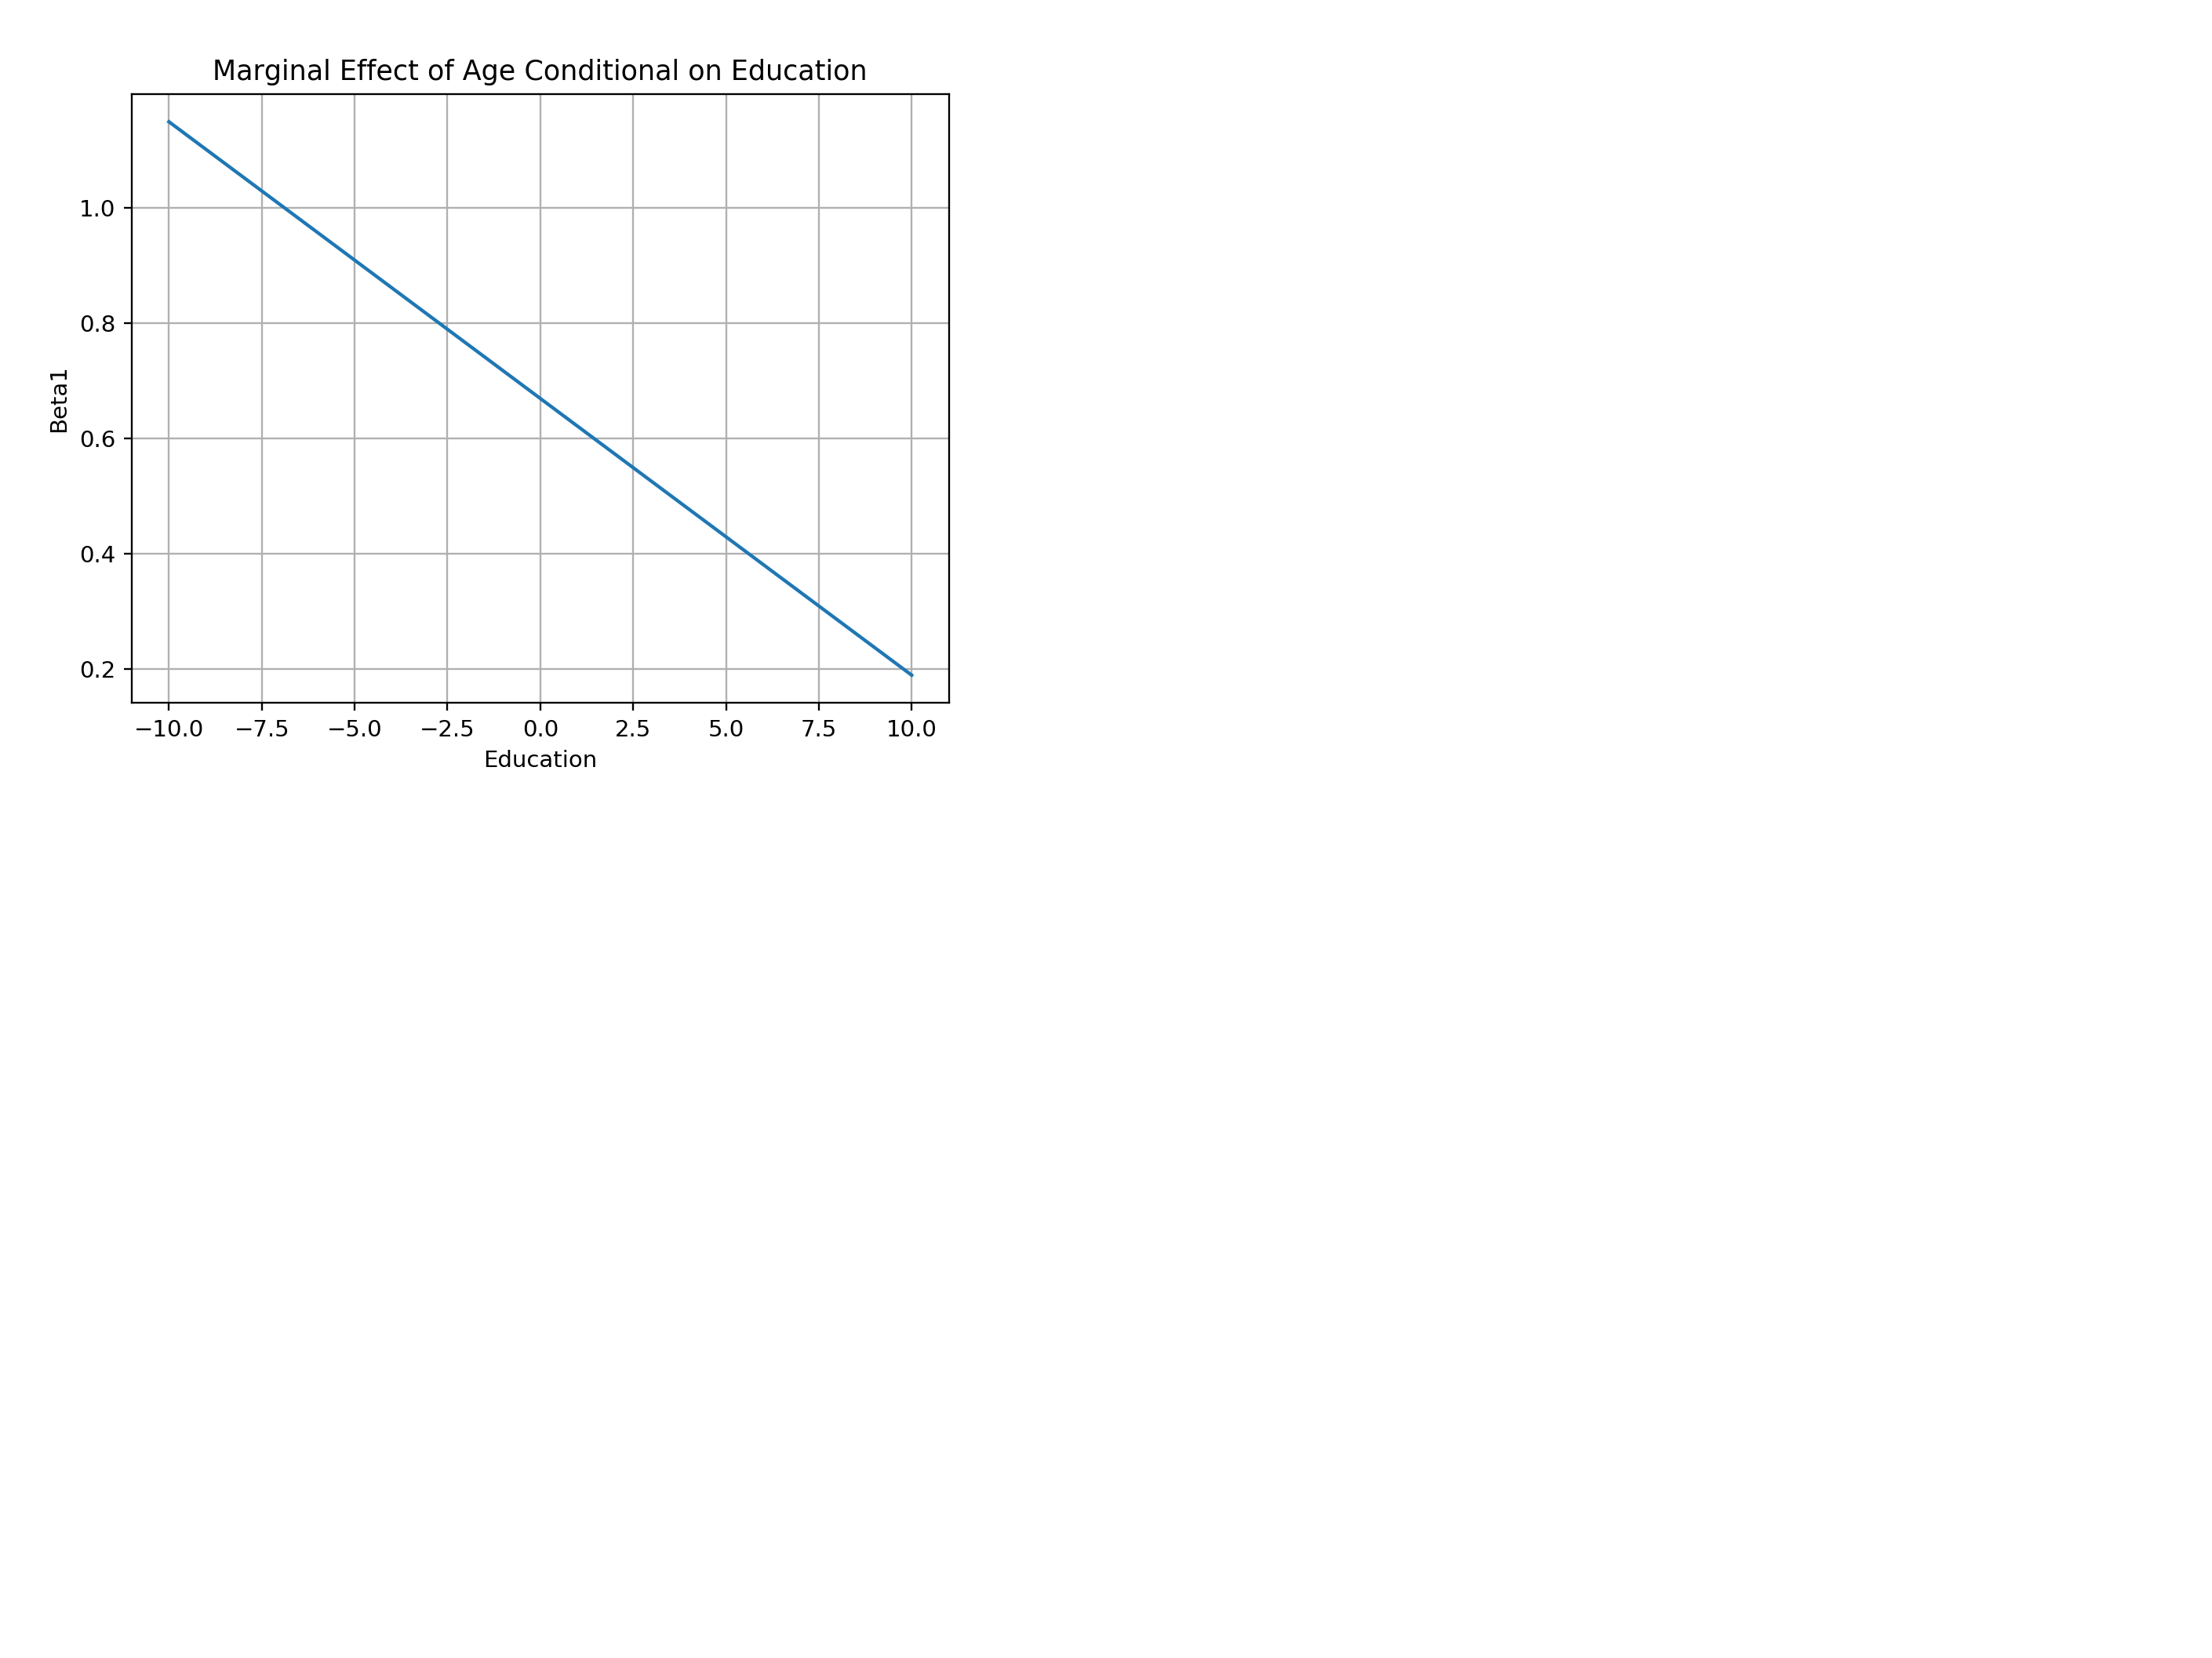

In [146]:
x = np.linspace(-10, 10, 1000)    
fig, ax = plt.subplots()
ax.plot(x, (0.67-0.048*x))
ax.grid(True, which='both')
ax.set_ylabel("Beta1")
ax.set_xlabel("Education")
ax.set_title("Marginal Effect of Age Conditional on Education")
plt.show()

### Part B 

The marginal effect of education is modeled as $\beta_2+\beta_3 X_1$. 
By observing the regression table we can see that the estimated effect of this model is $1.71-0.048age$.
All the coefficients from this model are significant at the .05 level implicating that the marginal effect of education decreases as individual's age increases.

<IPython.core.display.Javascript object>


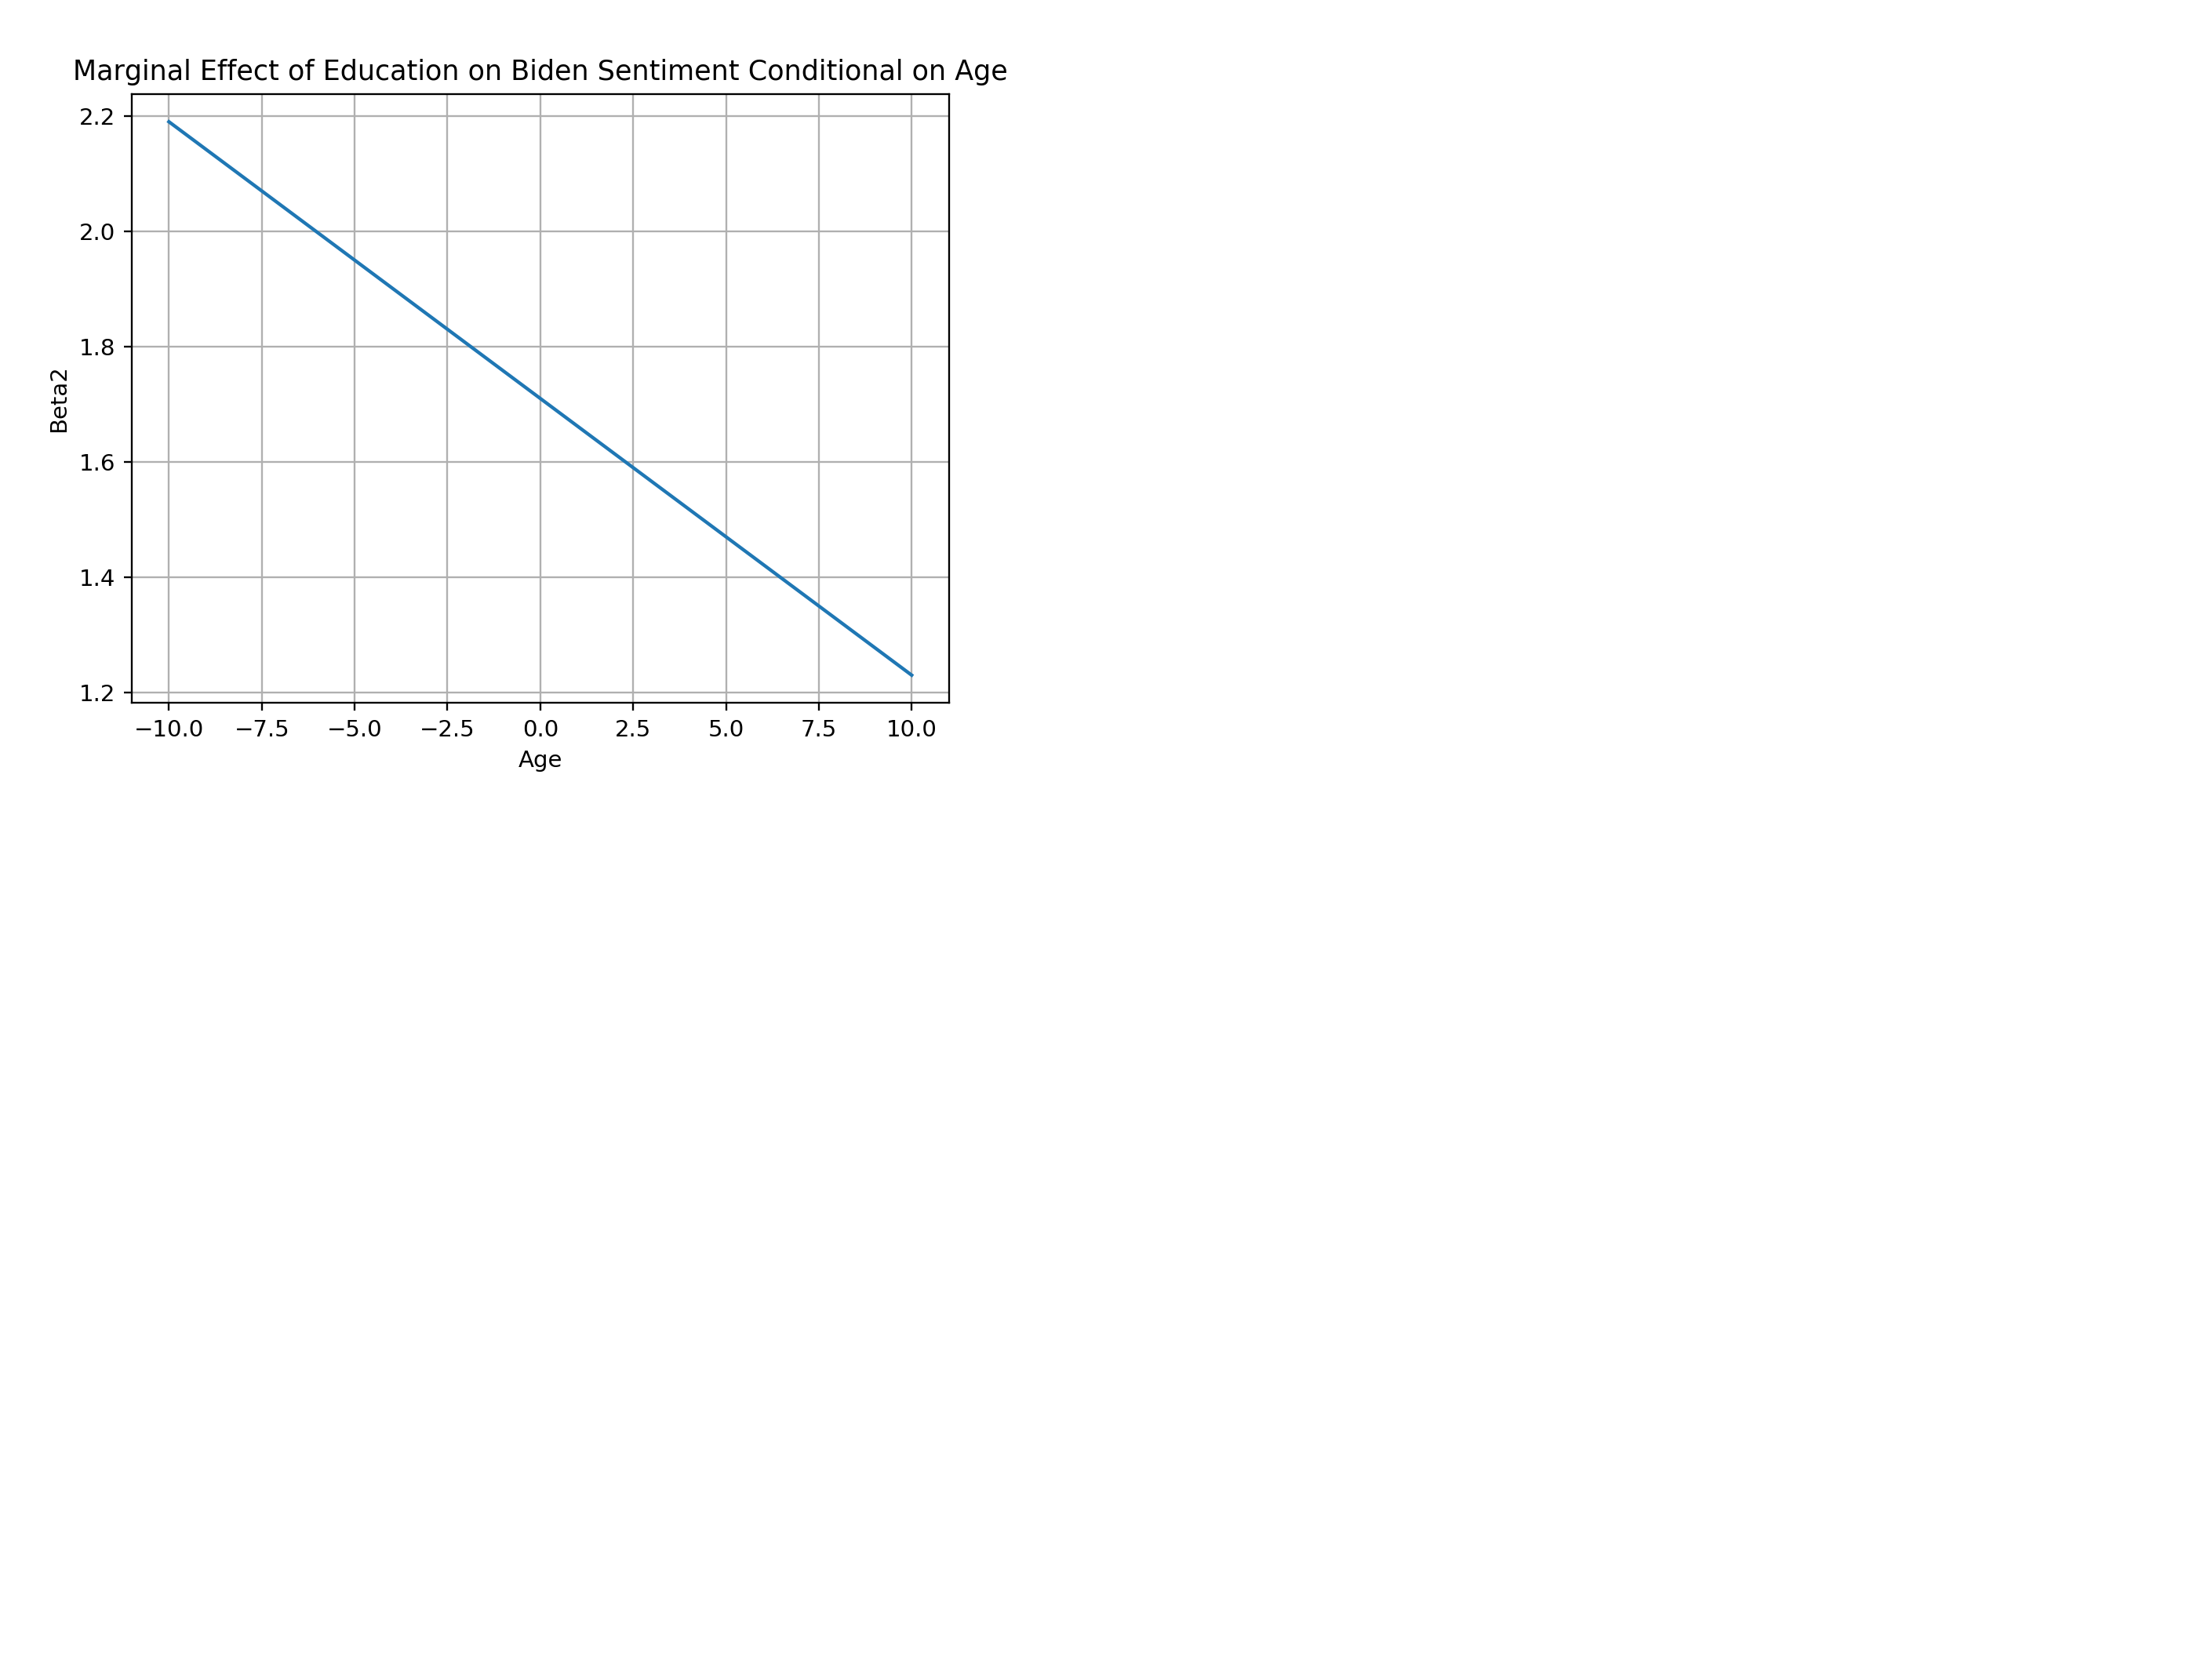

In [147]:
fig, ax = plt.subplots()
ax.plot(x, (1.71-0.048*x))
ax.grid(True, which='both')
ax.set_ylabel("Beta2")
ax.set_xlabel("Age")
ax.set_title("Marginal Effect of Education on Biden Sentiment Conditional on Age")
plt.show()